In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


- 1 = Basic Service
- 2 = E-Service
- 3 = Plus Service
- 4 = Total Service

In [4]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

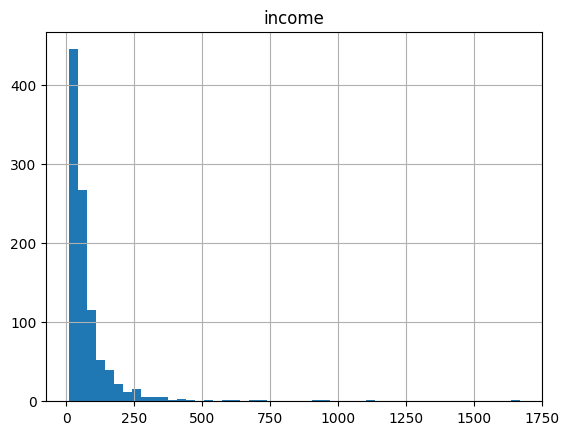

In [5]:
df.hist(column='income', bins=50)

<Axes: xlabel='age', ylabel='income'>

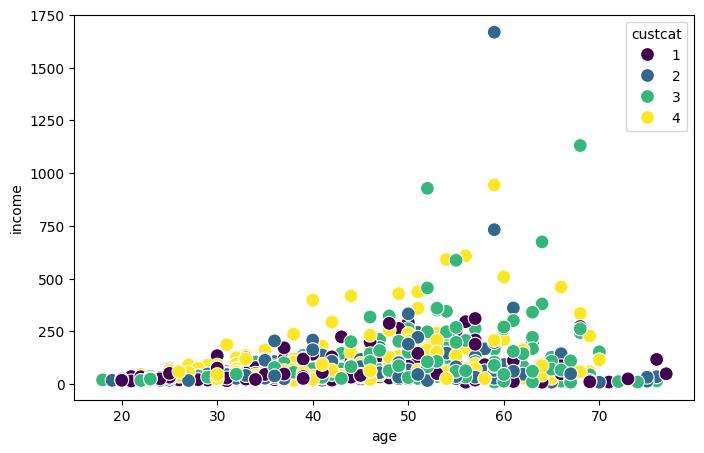

In [6]:
# age and income
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='income', hue='custcat', data=df, palette='viridis', s=100)

* 1- Pick a value for K
* 2- Calculate the distance of unknown case from all cases. (dissimilarity)
* 3- Select k-observations in the training data that are "nearest" to the unknown data point.
* 4- Predict the response of the unknown data point, using the most popular response value from the k-nearest neighbors.

For unknown case, first pick K=1

Calculate the make the prediction until K=20

Compare results.

- K=1 may capture the noise in data. A low value of K causes over-fitting. Prediction is not good enough for out-of-sample cases.
- K=20 The model becomes overly generalized, if value of K is too high.

- If we use 2 features (age, income), we are using it in a 2-dimensional space.
- We can also use the same distance matrix for multi-dimensional vectors.

# Exercise
- Normalize the data: StandardScaler
- Classification: KNeighboursClassifier
- Training: k = 4
- Evaluation: accuracy_score()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
# X = df[['age', 'income']]
# y = df['custcat']  # Target variable

# # Normalize the data using StandardScaler
# scaler = StandardScaler()
# X_normalized = scaler.fit_transform(df)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# # Initialize the KNN classifier with k=4
# knn = KNeighborsClassifier(n_neighbors=4)

# # Train the model
# knn.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = knn.predict(X_test)

# # Evaluate the model using accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')
# # Accuracy: 0.73

Target değerleri drop etmediğim için veriyi ezberledi.

In [9]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df)

In [10]:
# Assuming df contains your features (age, income) and target variable
X = df.drop('custcat', axis=1)
y = df['custcat']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [12]:
# Initialize the KNN classifier with k=4
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model using accuracy_score
print('Train set accuracy: ', accuracy_score(y_train, knn.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, y_pred))

Train set accuracy:  0.5575
Test set accuracy:  0.3


In [13]:
y_pred

array([3, 2, 1, 3, 1, 1, 3, 1, 1, 3, 4, 1, 2, 3, 3, 4, 2, 1, 1, 3, 3, 4,
       3, 4, 4, 1, 4, 1, 1, 3, 1, 1, 3, 4, 3, 1, 1, 4, 4, 2, 1, 1, 2, 3,
       4, 1, 4, 1, 3, 3, 1, 3, 4, 1, 3, 1, 4, 1, 4, 1, 3, 2, 1, 2, 1, 1,
       1, 4, 1, 1, 1, 4, 3, 1, 1, 1, 2, 2, 2, 1, 4, 3, 2, 1, 3, 3, 3, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 4, 1, 3, 4, 1, 2, 4, 1, 1, 3, 4, 2,
       2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 4, 3, 3, 3, 3, 3, 4, 2, 4, 3, 1, 4,
       4, 1, 3, 3, 3, 2, 1, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 4, 3, 3, 2, 3,
       2, 2, 2, 4, 2, 1, 3, 1, 3, 1, 1, 1, 4, 3, 3, 1, 1, 3, 2, 2, 3, 2,
       1, 1, 3, 1, 3, 4, 2, 3, 1, 3, 1, 2, 2, 1, 2, 1, 2, 4, 1, 4, 1, 4,
       4, 3], dtype=int64)

In [14]:
# Initialize the KNN classifier with k=4
knn6 = KNeighborsClassifier(n_neighbors=6)

# Train the model
knn6.fit(X_train, y_train)

# Make predictions on the test set
y_pred6 = knn6.predict(X_test)

# Evaluate the model using accuracy_score
print('Train set accuracy: ', accuracy_score(y_train, knn.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, y_pred6))

Train set accuracy:  0.5575
Test set accuracy:  0.33
